In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy as sp
import matplotlib.mlab as mlab
from pathlib import Path

In [2]:
variable = '[Tubulin]'
date = ['2019-06-10','2019-06-12','2019-06-13','2019-07-03','2019-07-04','2019-07-04_1']
jointdate = '_'.join(date)
micscp = 'DIC' #TIRF or DIC
paths = []

for i in date :
    p = 'E:\\Sofia\\2019_summer_dynamics_control\\'+i+'_'+micscp
    path = Path(p)
    paths = paths+[path]
    print(path.exists())

paths

True
True
True
True
True
True


[WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-06-10_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-06-12_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-06-13_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-07-03_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-07-04_DIC'),
 WindowsPath('E:/Sofia/2019_summer_dynamics_control/2019-07-04_1_DIC')]

In [3]:
name = ['growth','time2nuc','lifetime']

tubfitdata = pd.read_csv(path.parents[0]/('joint_fitdata_'+jointdate+'.csv'), encoding='utf-8',index_col=0)
tubG = pd.read_csv(path.parents[0]/('joint_'+name[0]+'_'+jointdate+'.csv'),sep=',');
tubN = pd.read_csv(path.parents[0]/('joint_'+name[1]+'_'+jointdate+'.csv'),sep=',');
tubC = pd.read_csv(path.parents[0]/('joint_'+name[2]+'_'+jointdate+'.csv'),sep=',');
tubfitdata

,[Tubulin],mu,sigma,scale e,shape,scale g
Value,6.0,0.227259,0.071685,18.337077,2.730937,0.660405
SE,6.0,0.005694,0.004649,2.404383,0.108279,0.031369
Value,7.0,0.399025,0.084541,14.669497,2.095348,1.566573
SE,7.0,0.001910,0.001560,0.871132,0.083181,0.079358
Value,8.0,0.414874,0.094281,8.325730,1.852157,2.106082
SE,8.0,0.002509,0.002049,0.384930,0.069941,0.104777
Value,10.0,0.658315,0.106446,6.508629,1.353426,4.730791
SE,10.0,0.002203,0.001799,0.320732,0.057471,0.293038
Value,12.0,0.781291,0.162291,3.641660,1.350240,4.963415
SE,12.0,0.003924,0.003204,0.193811,0.073064,0.393758


In [4]:
variable2 = '[DCX]'
date = ['2019-10-09','2019-10-23']
jointdate = '_'.join(date)
micscp = 'DIC' #TIRF or DIC
paths = []

for i in date :
    p = 'E:\\Sofia\\'+i+'_'+micscp
    path = Path(p)
    paths = paths+[path]
    print(path.exists())

paths

True
True


[WindowsPath('E:/Sofia/2019-10-09_DIC'),
 WindowsPath('E:/Sofia/2019-10-23_DIC')]

In [5]:
name = ['growth','time2nuc','lifetime','shrinkage']

fitdata = pd.read_csv(path.parents[0]/('joint_fitdata_'+jointdate+'.csv'), encoding='utf-8',index_col=0)
dcxG = pd.read_csv(path.parents[0]/('joint_'+name[0]+'_'+jointdate+'.csv'),sep=',');
dcxN = pd.read_csv(path.parents[0]/('joint_'+name[1]+'_'+jointdate+'.csv'),sep=',');
dcxC = pd.read_csv(path.parents[0]/('joint_'+name[2]+'_'+jointdate+'.csv'),sep=',');
dcxS = pd.read_csv(path.parents[0]/('joint_'+name[3]+'_'+jointdate+'.csv'),sep=',');

font = {'weight' : 'normal',
        'size'   : 24}
plt.rc('font', **font)
#plt.rcParams['font.family'] ='Helvetica Neue Lt Std'
fitdata

,[DCX],mu,sigma,scale e,shape,scale g,muS,sigmaS
Value,0.0,0.244203,0.066294,20.670987,2.432609,0.869288,5.530480,2.585637
SE,0.0,0.002500,0.002041,2.995588,0.112295,0.049030,0.688882,0.568389
Value,25.0,0.624869,0.096874,3.848201,1.694368,4.259612,1.975293,0.537112
SE,25.0,0.003033,0.002476,0.331385,0.124125,0.431251,0.027126,0.022149
Value,50.0,1.046900,0.311156,0.857219,1.489393,5.634209,3.278332,1.555173
SE,50.0,0.029748,0.024290,0.024481,0.118657,0.650003,0.098608,0.081396
Value,100.0,0.815622,0.107786,0.733909,3.319740,4.272307,2.015209,0.876573
SE,100.0,0.009993,0.008160,0.018602,0.384633,0.574982,0.064752,0.053197


In [6]:
conc = fitdata[variable2]['Value'].values
gamma_mu = np.multiply(fitdata['scale g']['Value'].values,fitdata['shape']['Value'].values)
gamma_muSE = np.add(np.multiply(fitdata['scale g']['Value'].values,fitdata['shape']['SE'].values),np.multiply(fitdata['scale g']['SE'].values,fitdata['shape']['Value'].values))

tubgamma_mu = np.multiply(tubfitdata['scale g']['Value'].values,tubfitdata['shape']['Value'].values)
tubgamma_muSE = np.add(np.multiply(tubfitdata['scale g']['Value'].values,tubfitdata['shape']['SE'].values),np.multiply(tubfitdata['scale g']['SE'].values,tubfitdata['shape']['Value'].values))

def linear_fit(x, a0, a1):
    return a0 + x*a1

coeffG, var_matrixG = sp.optimize.curve_fit(linear_fit,conc, fitdata['mu']['Value'].values)
varianceG = np.diagonal(var_matrixG) #Refer [3]
SEG = np.sqrt(varianceG) #Refer [4]

a0 = coeffG[0]
a1 = coeffG[1]
y_int = -a0/a1
y_int_SE = y_int*(abs(SEG[0]/a0)+abs(SEG[1]/a1))


coeffL, var_matrixL = sp.optimize.curve_fit(linear_fit,conc, gamma_mu)
varianceL = np.diagonal(var_matrixL) #Refer [3]
SEL = np.sqrt(varianceL) #Refer [4]

A0 = coeffL[0]
A1 = coeffL[1]
Y_int = -A0/A1
Y_int_SE = Y_int*(abs(SEL[0]/A0)+abs(SEL[1]/A1))

def exponential_nonorm(x, y0, a, k):
    return ((np.exp(-(x)*k) )*a+y0)

coeff, var_matrix = sp.optimize.curve_fit(exponential_nonorm,conc, fitdata['scale e']['Value'].values)
        
variance = np.diagonal(var_matrix) #Refer [3]
SE = np.sqrt(variance) #Refer [4]

#coeffC, var_matrixC = sp.optimize.curve_fit(exponential_nonorm,gamma_mu,fitdata['scale e']['Value'].values)
        
# varianceC = np.diagonal(var_matrix) #Refer [3]
# SEC = np.sqrt(variance) #Refer [4]

x_range = np.arange(0,107,0.1)

In [7]:
gamma_muSE
blue = '#23459C'
orange = '#FF7300'
green = '#79BA1A'

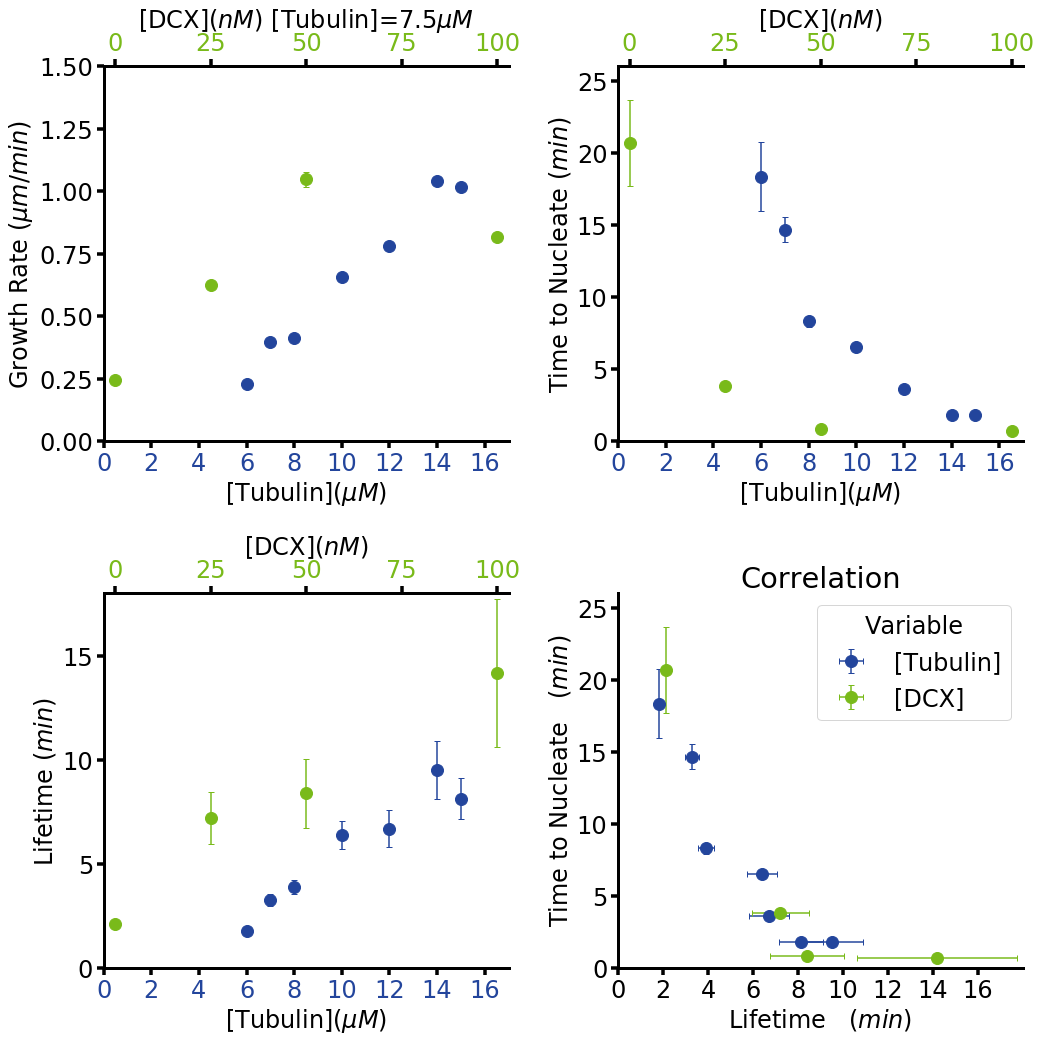

In [8]:
titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = ('Growth Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$','Time to Nucleate   ' r'$ (min)$')

ylim = 26
scattersize = 12

fig, ax = plt.subplots(2,2,figsize=(15,15))
#plt.suptitle('Fitted pooled data', fontsize=30)


ax[0][0].errorbar(tubfitdata[variable]['Value'], tubfitdata['mu']['Value'].values, yerr=tubfitdata['mu']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=blue)
ax[0][0].set_ylim(0,1.5)
ax[0][0].tick_params(axis='x', labelcolor= blue)

ax1 = ax[0][0].twiny() 
ax1.errorbar(fitdata[variable2]['Value'], fitdata['mu']['Value'].values, yerr=fitdata['mu']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=green)
ax1.set_xlim(-3,103)
ax1.set_xlabel(variable2 + r'$(nM)$')
ax1.set_xticks(np.arange(0, 101, 25))
ax1.tick_params(axis='x', labelcolor= green, width = 3.5, length = 7)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_lw(3)

ax[0][1].errorbar(tubfitdata[variable]['Value'], tubfitdata['scale e']['Value'].values, yerr=tubfitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=blue)
ax[0][1].set_ylim(0,ylim)
ax[0][1].tick_params(axis='x', labelcolor= blue)

ax1 = ax[0][1].twiny() 
ax1.errorbar(fitdata[variable2]['Value'], fitdata['scale e']['Value'].values, yerr=fitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=green)
ax1.set_xlim(-3,103)
ax1.set_xlabel(variable2 + r'$(nM)$')
ax1.set_xticks(np.arange(0, 101, 25))
ax1.tick_params(axis='x', labelcolor= green, width = 3.5, length = 7)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_lw(3)



ax[1][0].errorbar(tubfitdata[variable]['Value'], tubgamma_mu, yerr=tubgamma_muSE, fmt='o', markersize=scattersize,capsize = 3,color=blue)
ax[1][0].set_ylim(0,18)
ax[1][0].tick_params(axis='x', labelcolor= blue)

ax1 = ax[1][0].twiny() 
ax1.errorbar(fitdata[variable2]['Value'], gamma_mu, yerr=gamma_muSE, fmt='o', markersize=scattersize,capsize = 3,color=green)
ax1.set_xlim(-3,103)
ax1.set_xlabel(variable2 + r'$(nM)$')
ax1.tick_params(axis='x', labelcolor= green, width = 3.5, length = 7)
ax1.set_xticks(np.arange(0, 101, 25))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_lw(3)


ax[1][1].errorbar( tubgamma_mu,tubfitdata['scale e']['Value'].values, xerr=tubgamma_muSE , yerr=tubfitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color = blue)
ax[1][1].errorbar( gamma_mu,fitdata['scale e']['Value'].values, xerr=gamma_muSE , yerr=fitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color = green)
ax[1][1].set_ylim(0,ylim)
ax[1][1].legend((variable,variable2),loc='upper right',title='Variable')



count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlabel(variable + r'$(\mu M)$')
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].set_xlim(0,17)
        ax[i][j].set_xticks(np.arange(0, 17, 2))
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        count += 1

ax[1][1].set_xlabel('Lifetime   ' r'$(min)$') 
ax[1][1].set_xlim(0,18)
ax[1][1].set_title(titles[3]);
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('joint_graphsFit_corr_'+jointdate+'.pdf'))

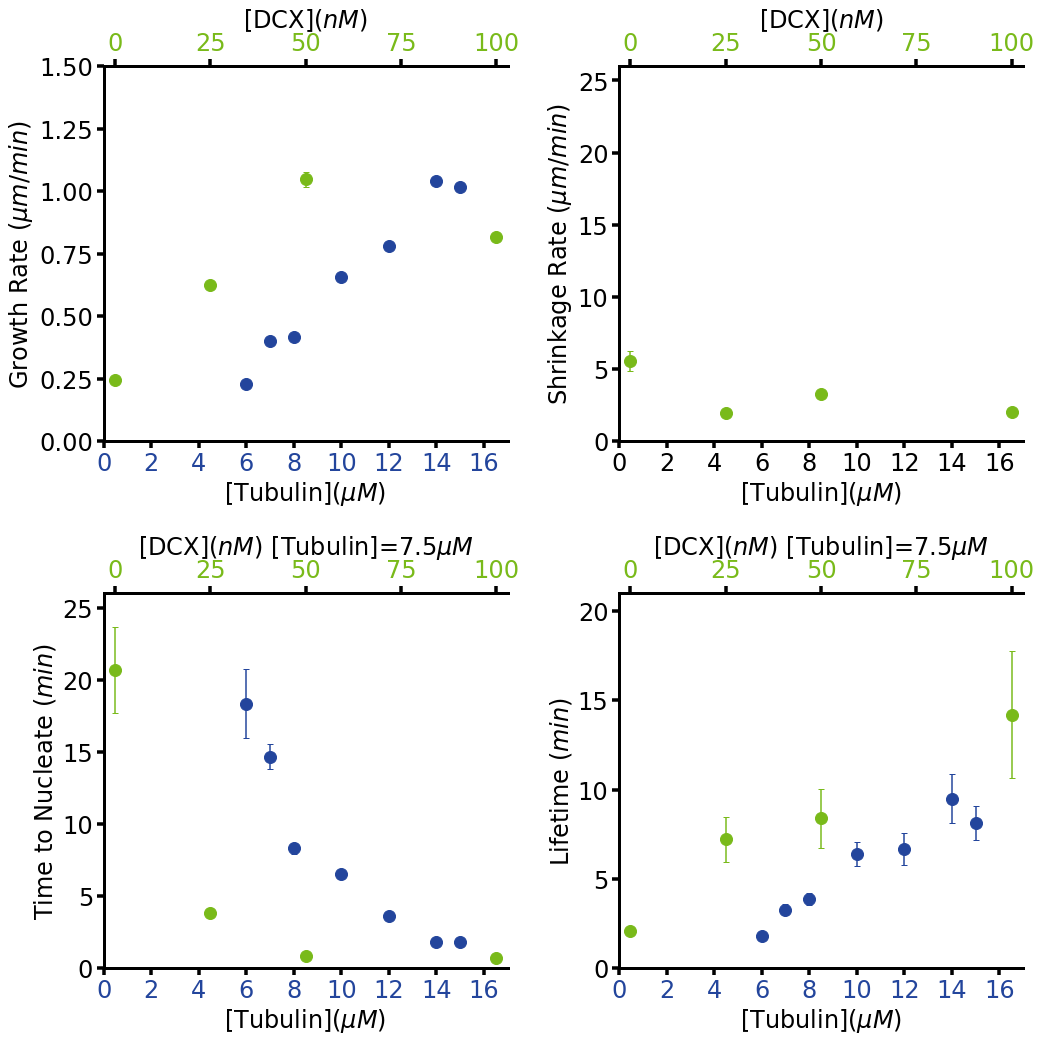

In [9]:
titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = ('Growth Rate ' r'$(\mu m / min)$','Shrinkage Rate ' r'$(\mu m / min)$','Time to Nucleate ' r'$(min)$','Lifetime ' r'$(min)$')

ylim = 26
scattersize = 12

fig, ax = plt.subplots(2,2,figsize=(15,15))
#plt.suptitle('Fitted pooled data', fontsize=30)


ax[0][0].errorbar(tubfitdata[variable]['Value'], tubfitdata['mu']['Value'].values, yerr=tubfitdata['mu']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=blue)
ax[0][0].set_ylim(0,1.5)
ax[0][0].tick_params(axis='x', labelcolor= blue)

ax1 = ax[0][0].twiny() 
ax1.errorbar(fitdata[variable2]['Value'], fitdata['mu']['Value'].values, yerr=fitdata['mu']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=green)
ax1.set_xlim(-3,103)
ax1.set_xlabel(variable2 + r'$(nM)$')
ax1.set_xticks(np.arange(0, 101, 25))
ax1.tick_params(axis='x', labelcolor= green, width = 3.5, length = 7)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_lw(3)

ax[1][0].errorbar(tubfitdata[variable]['Value'], tubfitdata['scale e']['Value'].values, yerr=tubfitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=blue)
ax[1][0].set_ylim(0,ylim)
ax[1][0].tick_params(axis='x', labelcolor= blue)

ax1 = ax[1][0].twiny() 
ax1.errorbar(fitdata[variable2]['Value'], fitdata['scale e']['Value'].values, yerr=fitdata['scale e']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=green)
ax1.set_xlim(-3,103)
ax1.set_xlabel(variable2 + r'$(nM)$'  + ' [Tubulin]='  + r'$7.5 \mu M$')
ax1.set_xticks(np.arange(0, 101, 25))
ax1.tick_params(axis='x', labelcolor= green, width = 3.5, length = 7)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_lw(3)


ax[1][1].errorbar(tubfitdata[variable]['Value'], tubgamma_mu, yerr=tubgamma_muSE, fmt='o', markersize=scattersize,capsize = 3,color=blue)
ax[1][1].set_ylim(0,21)
ax[1][1].tick_params(axis='x', labelcolor= blue)

ax1 = ax[1][1].twiny() 
ax1.errorbar(fitdata[variable2]['Value'], gamma_mu, yerr=gamma_muSE, fmt='o', markersize=scattersize,capsize = 3,color=green)
ax1.set_xlim(-3,103)
ax1.set_xlabel(variable2 + r'$(nM)$'  + ' [Tubulin]='  + r'$7.5 \mu M$')
ax1.tick_params(axis='x', labelcolor= green, width = 3.5, length = 7)
ax1.set_xticks(np.arange(0, 101, 25))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_lw(3)


#ax[0][1].errorbar(fitdata[variable2]['Value'], fitdata['muS']['Value'].values, yerr=fitdata['muS']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=blue)
ax[0][1].set_ylim(0,ylim)

ax1 = ax[0][1].twiny() 
ax1.errorbar(fitdata[variable2]['Value'], fitdata['muS']['Value'].values, yerr=fitdata['muS']['SE'].values, fmt='o', markersize=scattersize,capsize = 3,color=green)
ax1.set_xlim(-3,103)
ax1.set_xlabel(variable2 + r'$(nM)$')
ax1.set_xticks(np.arange(0, 101, 25))
ax1.tick_params(axis='x', labelcolor= green, width = 3.5, length = 7)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_lw(3)



count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlabel(variable + r'$(\mu M)$')
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].set_xlim(0,17)
        ax[i][j].set_xticks(np.arange(0, 17, 2))
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        count += 1

#ax[1][1].set_title(titles[3]);
plt.tight_layout()
plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.pdf'))